In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from tqdm import tqdm
import time

train = pd.read_csv("CSV_train.csv",low_memory=False,delimiter=';')
test=pd.read_csv("CSV_test.csv",low_memory=False,delimiter=',')
hidden=pd.read_csv("CSV_hidden_test.csv",low_memory=False,delimiter=',')

In [2]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136786 entries, 0 to 136785
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   WELL                              136786 non-null  object 
 1   DEPTH_MD                          136786 non-null  float64
 2   X_LOC                             136727 non-null  float64
 3   Y_LOC                             136727 non-null  float64
 4   Z_LOC                             136727 non-null  float64
 5   GROUP                             136786 non-null  object 
 6   FORMATION                         129712 non-null  object 
 7   CALI                              131141 non-null  float64
 8   RSHA                              39097 non-null   float64
 9   RMED                              136199 non-null  float64
 10  RDEP                              136727 non-null  float64
 11  RHOB                              119826 non-null  f

In [3]:
# storing length of datasets 
train_len = train.shape[0] 
test_len = test.shape[0]
All_data = pd.concat((train,test,hidden)).reset_index(drop=True) 

lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}
All_data['Lithology'] = All_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_keys)
All_data

WELL   DEPTH_MD         X_LOC      Y_LOC        Z_LOC  \
0        15/9-13   494.5280  437641.96875  6470972.5  -469.501831   
1        15/9-13   494.6800  437641.96875  6470972.5  -469.653809   
2        15/9-13   494.8320  437641.96875  6470972.5  -469.805786   
3        15/9-13   494.9840  437641.96875  6470972.5  -469.957794   
4        15/9-13   495.1360  437641.96875  6470972.5  -470.109772   
...          ...        ...           ...        ...          ...   
1429689   35/9-7  2973.2988  536096.06250  6793022.0 -2943.444580   
1429690   35/9-7  2973.4508  536096.06250  6793022.0 -2943.595947   
1429691   35/9-7  2973.6028  536096.06250  6793022.0 -2943.747559   
1429692   35/9-7  2973.7548  536096.06250  6793022.0 -2943.899170   
1429693   35/9-7  2973.9068  536096.06250  6793022.0 -2944.050537   

                GROUP  FORMATION       CALI  RSHA      RMED  ...         DTS  \
0        NORDLAND GP.        NaN  19.480835   NaN  1.611410  ...         NaN   
1        NORDLAND GP.        NaN  19.468800   NaN  1.618070  ...         NaN   
2        NORDLAND GP.        NaN  19.468800   NaN  1.626459  ...         NaN   
3        NORDLAND GP.        NaN  19.459282   NaN  1.621594  ...         NaN   
4        NORDLAND GP.        NaN  19.453100   NaN  1.602679  ...         NaN   
...               ...        ...        ...   ...       ...  ...         ...   
1429689      BAAT GP.  Etive Fm.   8.276272   NaN  2.820439  ...  136.911575   
1429690      BAAT GP.  Etive Fm.   8.267273   NaN  3.020778  ...  137.583923   
1429691      BAAT GP.  Etive Fm.   8.250099   NaN  2.795711  ...  138.310898   
1429692      BAAT GP.  Etive Fm.        NaN   NaN  2.658694  ...  137.592819   
1429693      BAAT GP.  Etive Fm.        NaN   NaN  2.802693  ...  136.129761   

         DCAL      DRHO  MUDWEIGHT      RMIC       ROPA  RXO  \
0         NaN -0.574928        NaN       NaN        NaN  NaN   
1         NaN -0.570188        NaN       NaN        NaN  NaN   
2         NaN -0.574245        NaN       NaN        NaN  NaN   
3         NaN -0.586315        NaN       NaN        NaN  NaN   
4         NaN -0.597914        NaN       NaN        NaN  NaN   
...       ...       ...        ...       ...        ...  ...   
1429689   NaN  0.502458        NaN  2.311106  24.306124  NaN   
1429690   NaN  0.374753        NaN  1.853418  22.201078  NaN   
1429691   NaN  0.211487        NaN  1.325961  20.096741  NaN   
1429692   NaN  0.147950        NaN  1.260347  17.992323  NaN   
1429693   NaN  0.174232        NaN  1.266063  15.889325  NaN   

         FORCE_2020_LITHOFACIES_LITHOLOGY  FORCE_2020_LITHOFACIES_CONFIDENCE  \
0                                   65000                                1.0   
1                                   65000                                1.0   
2                                   65000                                1.0   
3                                   65000                                1.0   
4                                   65000                                1.0   
...                                   ...                                ...   
1429689                             65000                                2.0   
1429690                             65000                                2.0   
1429691                             65000                                2.0   
1429692                             65000                                2.0   
1429693                             65000                                2.0   

         Lithology  
0            Shale  
1            Shale  
2            Shale  
3            Shale  
4            Shale  
...            ...  
1429689      Shale  
1429690      Shale  
1429691      Shale  
1429692      Shale  
1429693      Shale  

[1429694 rows x 30 columns]

C:\Users\Ayori\AppData\Local\Temp/ipykernel_16580/1610525732.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names, rotation=45)


Text(0, 0.5, 'Lithology presence (\\%)')

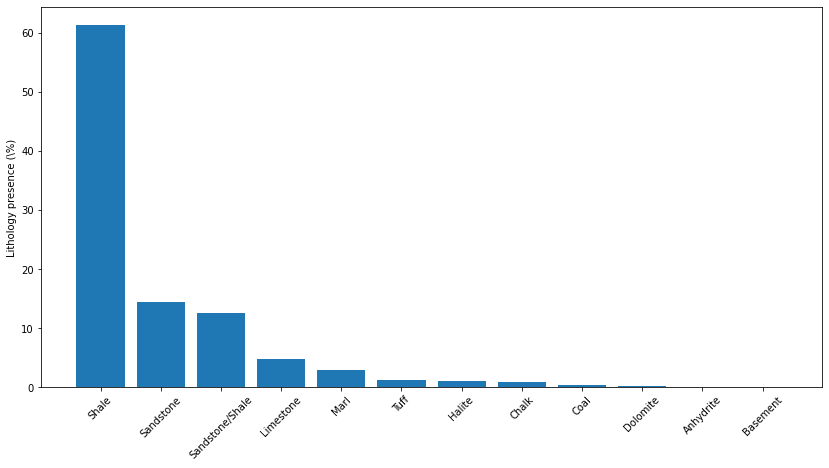

In [4]:
counts = All_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()
names = []
percentage = []
N = All_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].shape[0]
for item in counts.iteritems():
    names.append(lithology_keys[item[0]])
    percentage.append(float(item[1])/N*100)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(len(names)), height=percentage)
ax.set_xticklabels(names, rotation=45)
ax.set_xticks(np.arange(len(names)))
ax.set_ylabel('Lithology presence (\%)')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   WELL                               1170511 non-null  object 
 1   DEPTH_MD                           1170511 non-null  float64
 2   X_LOC                              1159736 non-null  float64
 3   Y_LOC                              1159736 non-null  float64
 4   Z_LOC                              1159736 non-null  float64
 5   GROUP                              1169233 non-null  object 
 6   FORMATION                          1033517 non-null  object 
 7   CALI                               1082634 non-null  float64
 8   RSHA                               630650 non-null   float64
 9   RMED                               1131518 non-null  float64
 10  RDEP                               1159496 non-null  float64
 11  RHOB                    

C:\Users\Ayori\AppData\Local\Temp/ipykernel_16580/2944108506.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(train.columns[2:-2], rotation=45)


Text(0.5, 1.0, 'PERCENTAGE OF FEATURES IN TRAIN DATASET')

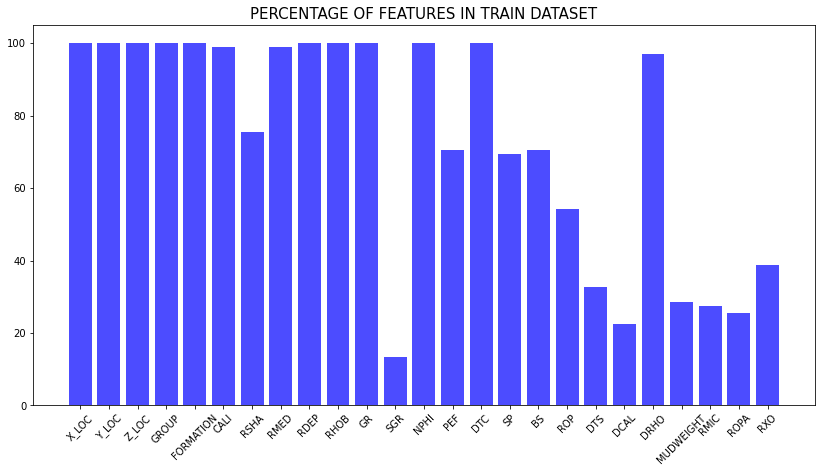

In [6]:
#percentage of feaures in a dataset
occurences = np.zeros(25)
for well in train['WELL'].unique():
    occurences += train[train['WELL'] == well].isna().all().astype(int).values[2:-2]
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(occurences.shape[0]), height=(train.WELL.unique().shape[0]-occurences)/train.WELL.unique().shape[0]*100.0, color='b', alpha=0.7)
ax.set_xticklabels(train.columns[2:-2], rotation=45)
ax.set_xticks(np.arange(occurences.shape[0]))
ax.set_title("PERCENTAGE OF FEATURES IN TRAIN DATASET", size=15)

C:\Users\Ayori\AppData\Local\Temp/ipykernel_16580/2393751769.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(test.columns[2:], rotation=45)


Text(0.5, 1.0, 'PERCENTAGE OF FEATURES IN TEST DATASET')

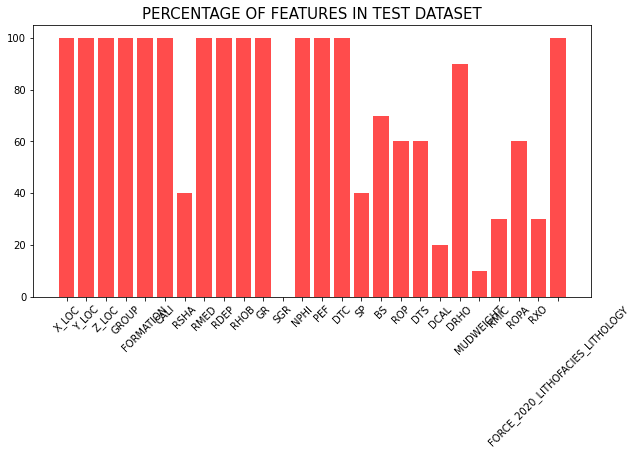

In [7]:
#percentage of feaures in a test dataset
occurences = np.zeros(26)
for well in test['WELL'].unique():
    occurences += test[test['WELL'] == well].isna().all().astype(int).values[2:]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.bar(x=np.arange(occurences.shape[0]), height=(test.WELL.unique().shape[0]-occurences)/test.WELL.unique().shape[0]*100.0, color='r', alpha=0.7)
ax.set_xticklabels(test.columns[2:], rotation=45)
ax.set_xticks(np.arange(occurences.shape[0]))
ax.set_title("PERCENTAGE OF FEATURES IN TEST DATASET", size=15)

C:\Users\Ayori\AppData\Local\Temp/ipykernel_16580/3092511454.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(test.columns[2:-2], rotation=45)


Text(0.5, 1.0, 'PERCENTAGE OF FEATURES IN TEST DATASET')

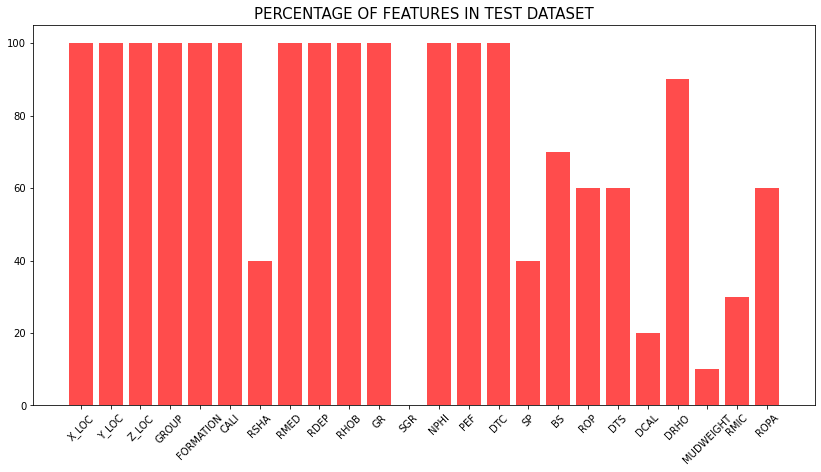

In [8]:
#percentage of feaures in a test dataset
occurences = np.zeros(24)
for well in test['WELL'].unique():
    occurences += test[test['WELL'] == well].isna().all().astype(int).values[2:-2]
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(occurences.shape[0]), height=(test.WELL.unique().shape[0]-occurences)/test.WELL.unique().shape[0]*100.0, color='r', alpha=0.7)
ax.set_xticklabels(test.columns[2:-2], rotation=45)
ax.set_xticks(np.arange(occurences.shape[0]))
ax.set_title("PERCENTAGE OF FEATURES IN TEST DATASET", size=15)

C:\Users\Ayori\AppData\Local\Temp/ipykernel_16580/2142184932.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(hidden.columns[2:-2], rotation=45)


Text(0.5, 1.0, 'PERCENTAGE OF FEATURES IN HIDDEN DATASET')

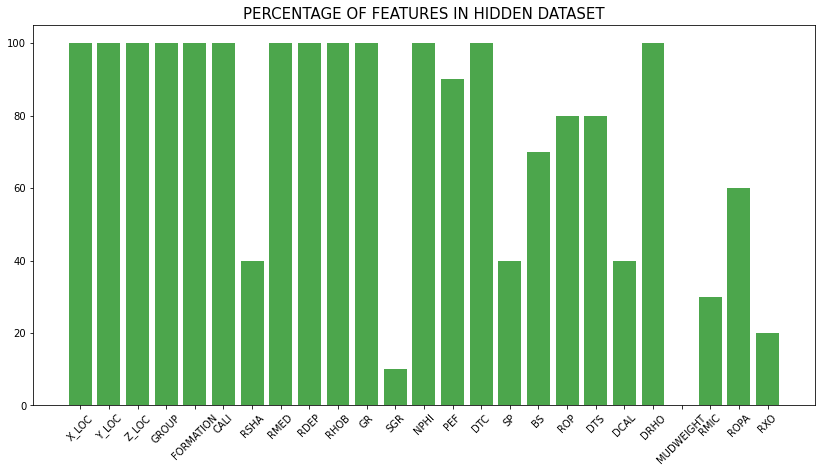

In [9]:
#percentage of feaures in a hidden dataset
occurences = np.zeros(25)
for well in hidden['WELL'].unique():
    occurences += hidden[hidden['WELL'] == well].isna().all().astype(int).values[2:-2]
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(occurences.shape[0]), height=(hidden.WELL.unique().shape[0]-occurences)/hidden.WELL.unique().shape[0]*100.0, color='g', alpha=0.7)
ax.set_xticklabels(hidden.columns[2:-2], rotation=45)
ax.set_xticks(np.arange(occurences.shape[0]))
ax.set_title("PERCENTAGE OF FEATURES IN HIDDEN DATASET", size=15)

In [10]:
hidden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122397 entries, 0 to 122396
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   WELL                               122397 non-null  object 
 1   DEPTH_MD                           122397 non-null  float64
 2   X_LOC                              122386 non-null  float64
 3   Y_LOC                              122386 non-null  float64
 4   Z_LOC                              122386 non-null  float64
 5   GROUP                              122397 non-null  object 
 6   FORMATION                          114248 non-null  object 
 7   CALI                               118954 non-null  float64
 8   RSHA                               25683 non-null   float64
 9   RMED                               112580 non-null  float64
 10  RDEP                               122386 non-null  float64
 11  RHOB                               1128

# Density - Neutron Distribution by Lithology

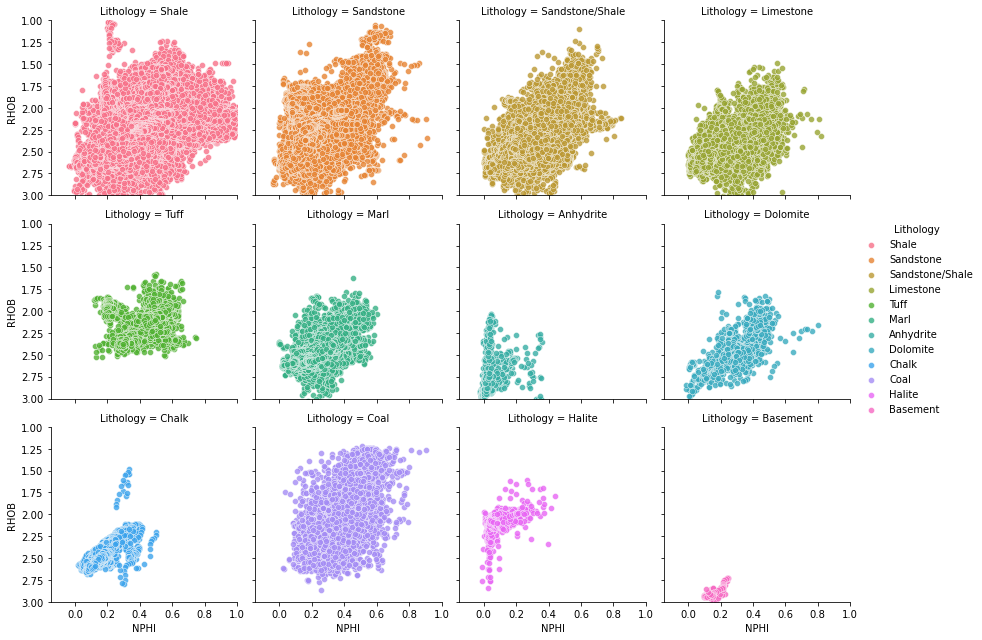

In [11]:
import seaborn as sns

plot_dn = sns.FacetGrid(All_data, col='Lithology', col_wrap=4, hue='Lithology')
plot_dn.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.8)
plot_dn.set(xlim=(-0.15, 1))
plot_dn.set(ylim=(3, 1))
plot_dn.add_legend();


# Density - Neutron Distribution by Lithology and Well

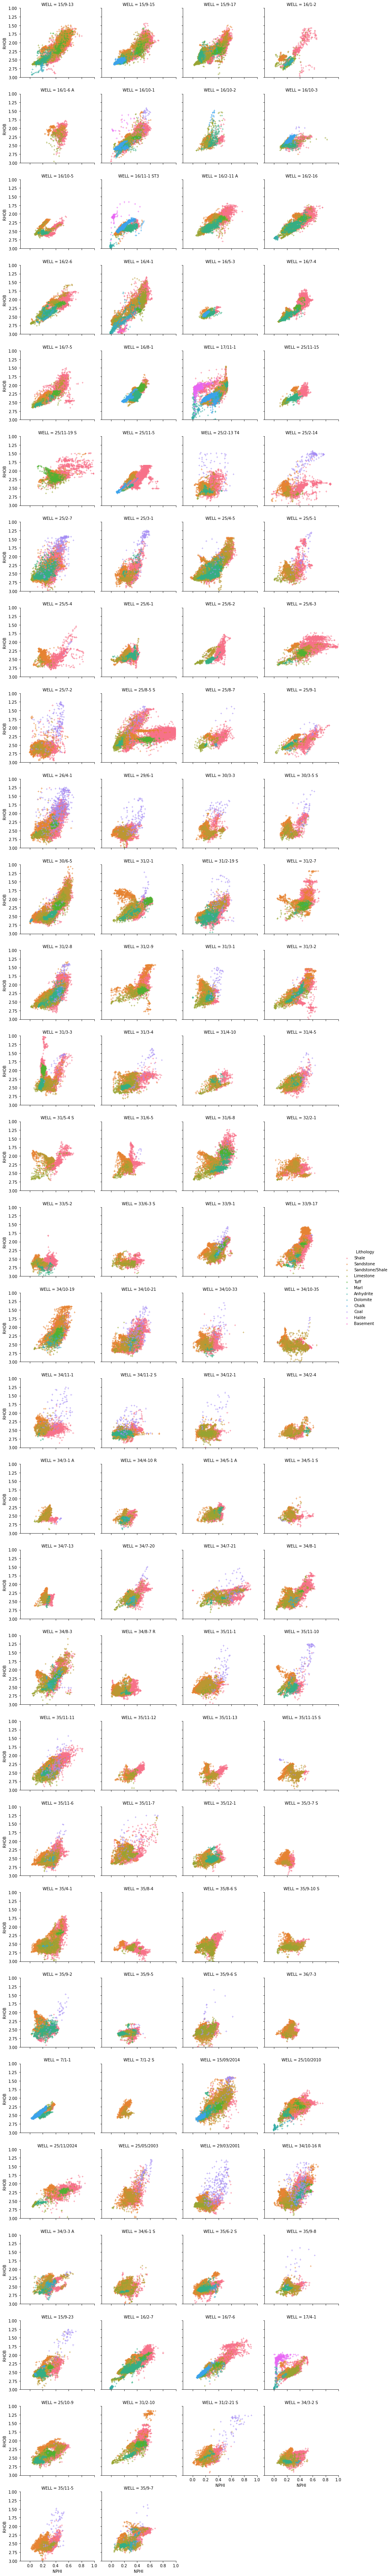

In [12]:
plot_dn = sns.FacetGrid(All_data, col='WELL', col_wrap=4, hue='Lithology')
plot_dn.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.8,linewidth=1, size=0.1, marker='+')
plot_dn.set(xlim=(-0.15, 1))
plot_dn.set(ylim=(3, 1))
plot_dn.add_legend();

# Density - Neutron Distribution by Lithology and Geological Group

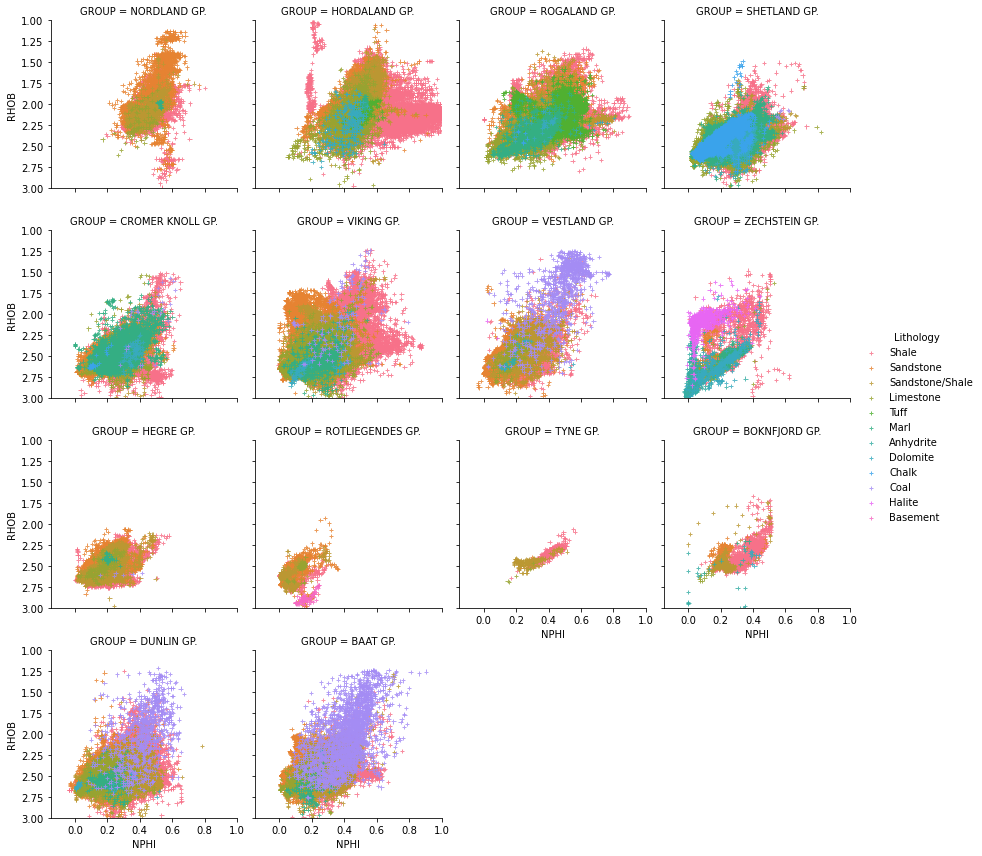

In [13]:
plot_dn = sns.FacetGrid(All_data, col='GROUP', col_wrap=4, hue='Lithology')
plot_dn.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.8,linewidth=1, size=0.1, marker='+')
plot_dn.set(xlim=(-0.15, 1))
plot_dn.set(ylim=(3, 1))
plot_dn.add_legend();

In [14]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}
train['Lithology'] = train['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_keys)
test['Lithology'] = test['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_keys)
hidden['Lithology'] = hidden['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_keys)
All_data['Lithology'] = All_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_keys)

# Identifying Bad Hole Data
To visualise where we have badhole data caused by borehole enlargement. Deterioration of the borehole wall can happen for a number of different reasons including undercompacted rocks and variations in stresses acting on those rocks such as the mud weight.

In [15]:
train_BS = train.dropna(subset=['BS', 'CALI']).copy()
train_BS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657745 entries, 18350 to 1170510
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   WELL                               657745 non-null  object 
 1   DEPTH_MD                           657745 non-null  float64
 2   X_LOC                              649822 non-null  float64
 3   Y_LOC                              649822 non-null  float64
 4   Z_LOC                              649822 non-null  float64
 5   GROUP                              657745 non-null  object 
 6   FORMATION                          600992 non-null  object 
 7   CALI                               657745 non-null  float64
 8   RSHA                               375101 non-null  float64
 9   RMED                               641156 non-null  float64
 10  RDEP                               649659 non-null  float64
 11  RHOB                              

In [16]:
train_BS['BS'].isna().sum()

0

In [17]:
train_BS['CALI'].isna().sum()

0

In [18]:
numer_of_BS_wells = train_BS['WELL'].nunique()
print(f"We have {numer_of_BS_wells} wells that have bit size log")

We have 68 wells that have bit size log


In [19]:
wells_BS = train_BS['WELL'].unique()
wells_BS

array(['15/9-15', '16/1-2', '16/1-6 A', '16/10-1', '16/10-2', '16/10-3',
       '16/10-5', '16/11-1 ST3', '16/2-11 A', '16/2-16', '16/2-6',
       '16/4-1', '16/5-3', '16/7-4', '25/11-15', '25/11-5', '25/2-13 T4',
       '25/2-14', '25/2-7', '25/3-1', '25/4-5', '25/5-4', '25/6-1',
       '25/6-2', '25/6-3', '25/7-2', '25/8-5 S', '25/8-7', '25/9-1',
       '26/4-1', '31/2-1', '31/2-19 S', '31/3-1', '31/3-2', '31/3-3',
       '31/3-4', '31/6-5', '31/6-8', '32/2-1', '33/5-2', '33/6-3 S',
       '33/9-1', '33/9-17', '34/10-33', '34/11-1', '34/12-1', '34/3-1 A',
       '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/7-13', '34/8-1',
       '34/8-7 R', '35/11-10', '35/11-11', '35/11-12', '35/11-13',
       '35/11-15 S', '35/11-7', '35/12-1', '35/3-7 S', '35/4-1',
       '35/8-6 S', '35/9-10 S', '35/9-2', '35/9-5', '7/1-1', '7/1-2 S'],
      dtype=object)

We need to calculate the difference between the bit size and the calliper logs to analyse the well conditions. If the result is a negative value, this indicates that the borehole has shrunken in size resulting from shale swelling. On the other hand, a positive value indicates that the borehole has increased in size due to caving resulting from a fragile formation.

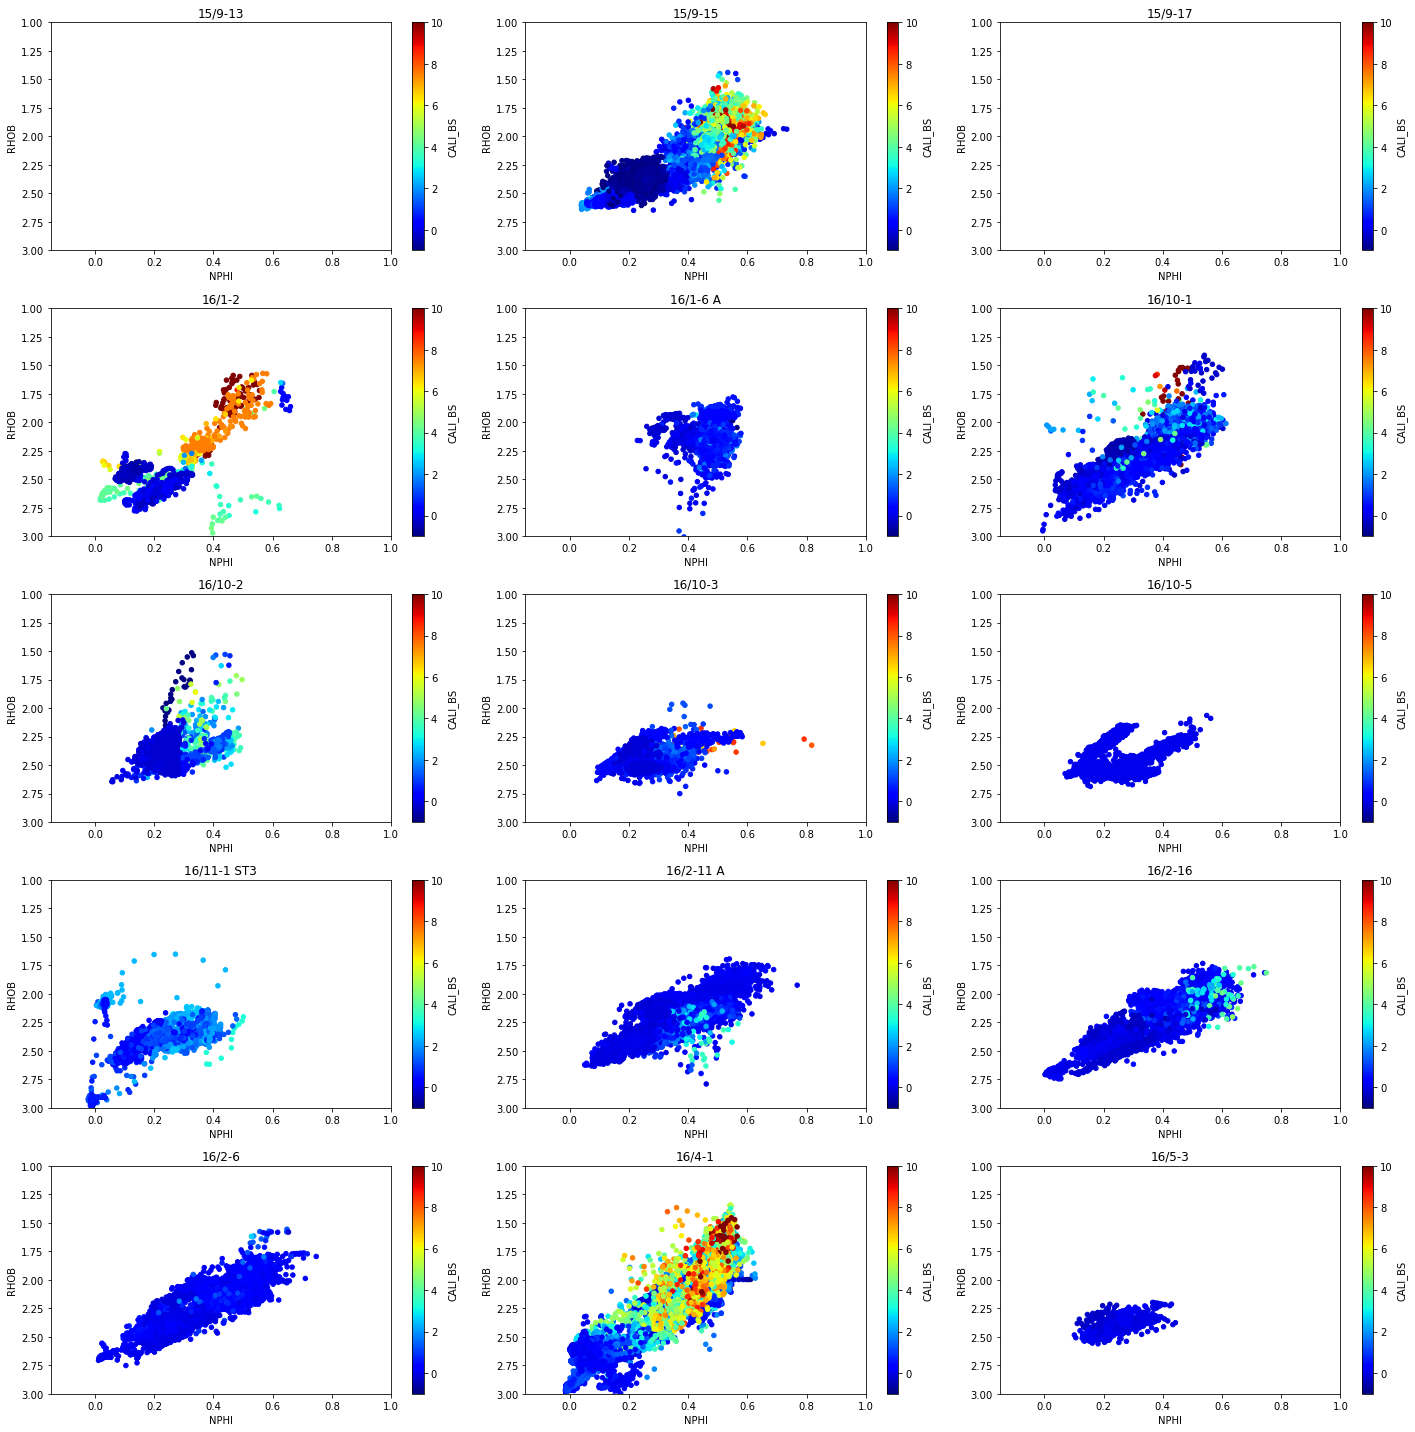

In [20]:
train['CALI_BS'] = train['CALI'] - train['BS']
well_group = train.groupby('WELL')
fig, axs = plt.subplots(5, 3, figsize=(20,20))
for (name, df), ax in zip(well_group, axs.flat):
    df.plot(kind='scatter', x='NPHI', y='RHOB', ax=ax, c='CALI_BS', cmap='jet', vmin=-1, vmax=10)
    ax.set_xlim(-0.15,1)
    ax.set_ylim(3,1)
    ax.set_title(name)
plt.tight_layout()

well 15/9–15 and 16/1–2 and 16/4-1 have badhole data

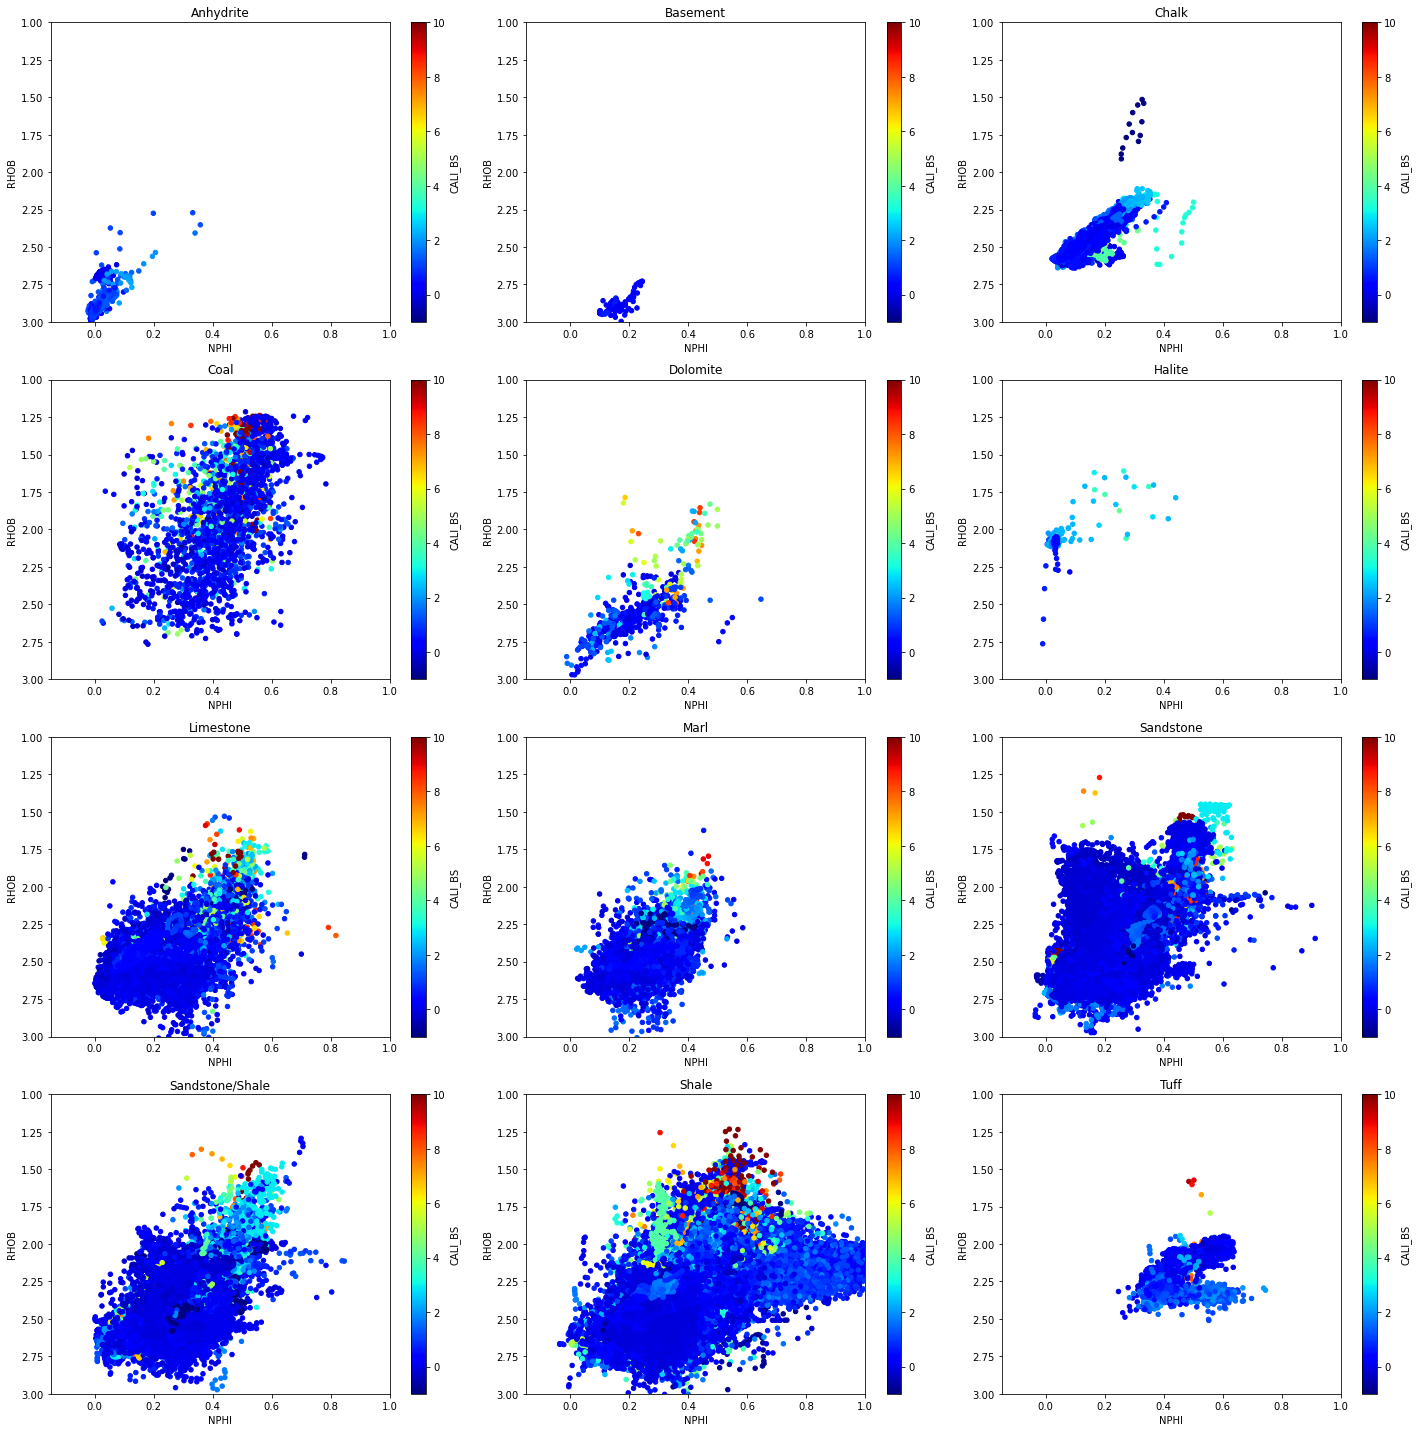

In [21]:
well_group_lith = train.groupby('Lithology')
fig, axs = plt.subplots(4, 3, figsize=(20,20))
for (name, df), ax in zip(well_group_lith, axs.flat):
    df.plot(kind='scatter', x='NPHI', y='RHOB', ax=ax, c='CALI_BS', cmap='jet', vmin=-1, vmax=10)
    ax.set_xlim(-0.15,1)
    ax.set_ylim(3,1)
    ax.set_title(name)
plt.tight_layout()

C:\Users\Ayori\AppData\Local\Temp/ipykernel_16580/1758235230.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(train.corr(method = 'pearson') , dtype=np.bool)


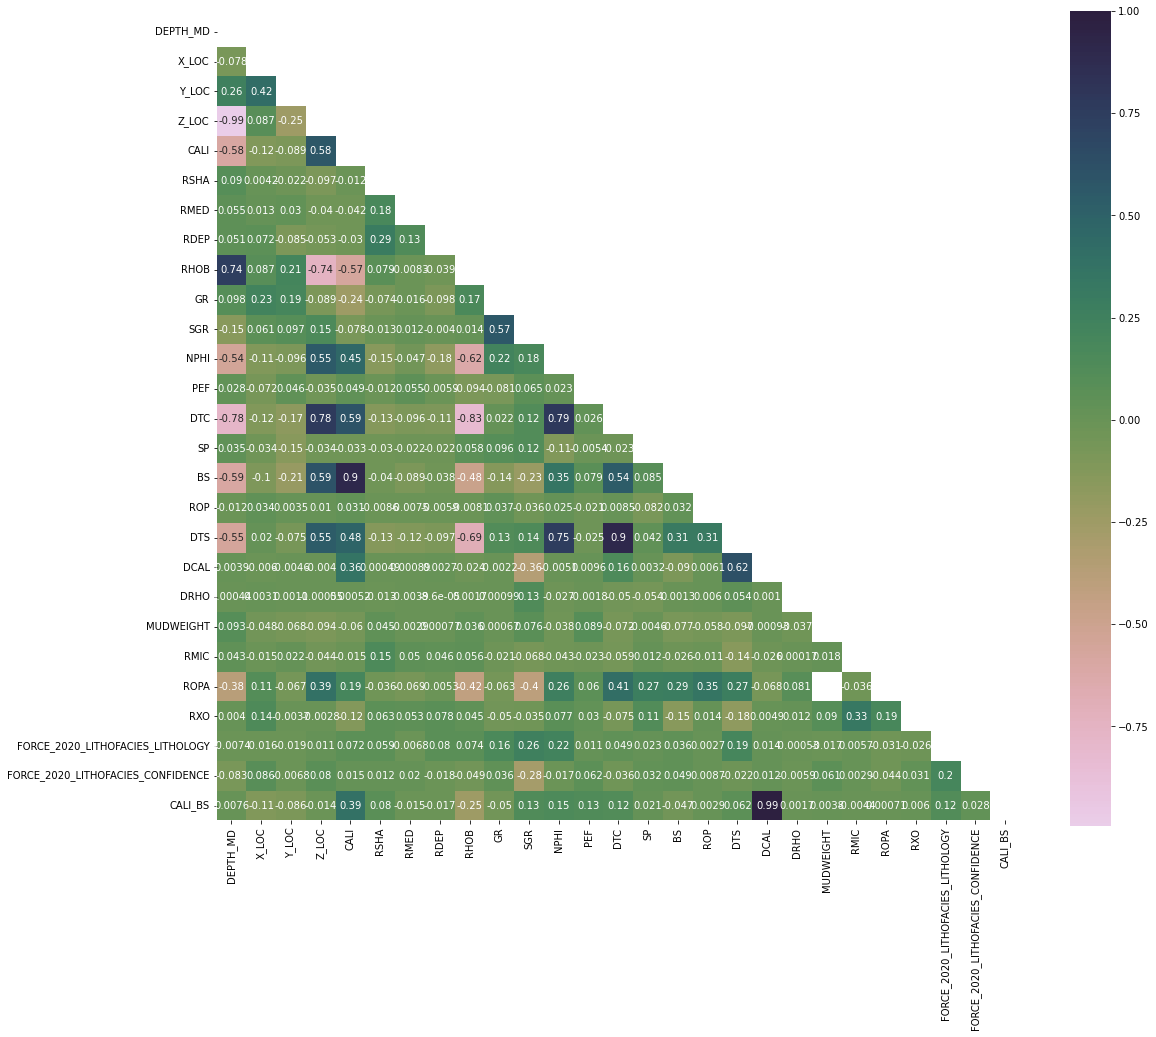

In [22]:
# Generate a mask for the upper triangle
mask = np.zeros_like(train.corr(method = 'pearson') , dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.cubehelix_palette(n_colors=12, start=-2.25, rot=-1.3, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(18,15))
sns.heatmap(train.corr(method = 'pearson') ,annot=True,  mask=mask, cmap=cmap, vmax=1, square=True)

plt.show()

In [23]:
import plotly.express as px
px.bar(train.sample(1000), 
           title='Lithology vs. Confidence',
           x='FORMATION',
           y='FORCE_2020_LITHOFACIES_LITHOLOGY',
           log_y=True,
#            log_x=True,
           color='RSHA')

In [25]:
fig = px.histogram(train.sample(1000), 
                   x='SP', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of SP')
fig.update_layout(bargap=0.1)
fig.show()

In [26]:
fig = px.histogram(train.sample(1000), 
                   x='GR', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of GR')
fig.update_layout(bargap=0.1)
fig.show()

In [27]:
fig = px.histogram(train.sample(1000), 
                   x='RMED', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of RMED')
fig.update_layout(bargap=0.1)
fig.show()

NameError: name 'x_train' is not defined

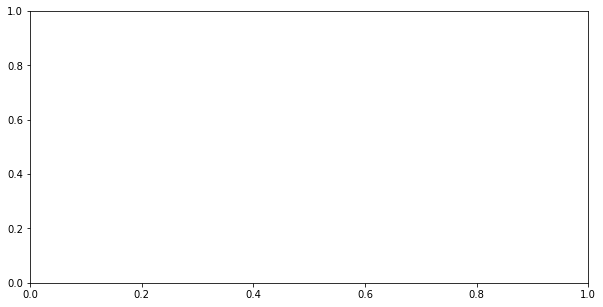

In [24]:
#Ploting K-Best Feature Importances
#Visualizing Accuracies
f, ax = plt.subplots(figsize=(10,5))
x_pos = np.arange(len(x_train.columns))

#Create Bars
ax.bar(x_pos, df_new.scores, color=(0.5, 0.7, 0.9, 0.9))
ax.set_ylabel('Scores', size=14)
ax.set_title('K-BEST FEATURE IMPORTANCE', size=20)

plt.xticks(x_pos, df_new.feature, rotation=90,ascending=False)
plt.grid(True)
plt.show()